# Description

After seeing that we could increase the returns by scaling after ComboSearch found optimal portfolios (see 20180228_Scale_Rets_After_Model_Selection.ipynb), we attempted to do the scaling on the model level (at the point of stock selection in the simulation). 

Below, `mult_vals` is the multiple associated with the scaling of the BOOKSIZE.

### Conclusion

Model level scaling does NOT appear to be additive. 

Perhaps when done on the combo-level, one gets the added benefit of diversification for the portfolio.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManagerGCP
from ram.analysis.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats, rollup_returns

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
RunManagerGCP.get_run_names('StatArbStrategy2')

,Run,RunDate,Completed,Description,Starred
0,run_0001,2018-02-15,True,"Smart factor, sector 20",
1,run_0002,2018-02-15,True,"Smart factor, all sectors",
2,run_0003,2018-02-22,True,"New run with smart factor, sector 20",
3,run_0004,2018-02-20,False,"New run with smart factor, sector 25",
4,run_0005,2018-02-20,False,"New run with smart factor, sector 45",
5,run_0007,2018-02-23,True,"Sector 20, new params, more features for sort",
6,run_0009,2018-02-24,True,"Bayes, Sector 20",
7,run_0012,2018-02-28,True,"Sector20, mult",


In [7]:
run1 = RunManagerGCP('StatArbStrategy2', 'run_0012')

In [8]:
run1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,holding_period,3,378,0.652736,0.052208,-999.0
1,holding_period,5,378,0.655879,0.056454,-999.0
2,holding_period,7,378,0.591762,0.055945,-999.0
3,holding_period,9,378,0.521966,0.052385,-999.0
4,model,"{u'max_features': 0.5, u'type': u'tree', u'min...",504,0.638929,0.058222,-999.0
5,model,"{u'max_features': 0.8, u'type': u'tree', u'min...",504,0.652984,0.059484,-999.0
6,model,{u'type': u'reg'},504,0.524843,0.045037,-999.0
7,mult_vals,False,504,0.660407,0.062810,-999.0
8,mult_vals,"[0.002, -0.001]",504,0.589526,0.050537,-999.0
9,mult_vals,"[0.002, 0]",504,0.566823,0.049398,-999.0


### Check to see if anything off with simulation numbers

In [9]:
run1.import_all_output()

In [10]:
# Exposure columns
expcols = [x for x in run1.all_output.columns if x.find('Exp') > -1]
turncols = [x for x in run1.all_output.columns if x.find('Turnover') > -1]
opencols = [x for x in run1.all_output.columns if x.find('OpenPositions') > -1]
longpl = [x for x in run1.all_output.columns if x.find('LongPL') > -1]
shortpl = [x for x in run1.all_output.columns if x.find('ShortPL') > -1]

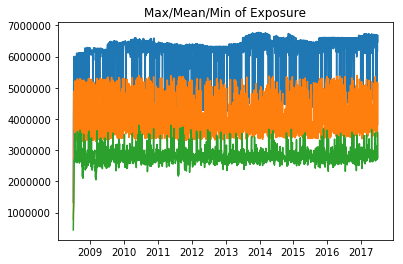

In [25]:
plt.figure()
plt.plot(run1.all_output[expcols].max(axis=1))
plt.plot(run1.all_output[expcols].mean(axis=1))
plt.plot(run1.all_output[expcols].min(axis=1))
plt.title('Max/Mean/Min of Exposure')
plt.show()

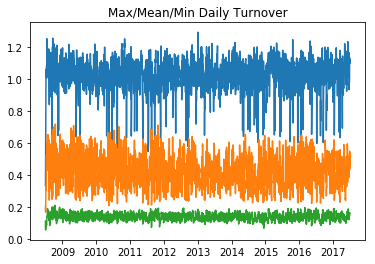

In [21]:
plt.figure()
plt.plot(run1.all_output[turncols].max(axis=1))
plt.plot(run1.all_output[turncols].mean(axis=1))
plt.plot(run1.all_output[turncols].min(axis=1))
plt.title('Max/Mean/Min Daily Turnover')
plt.show()

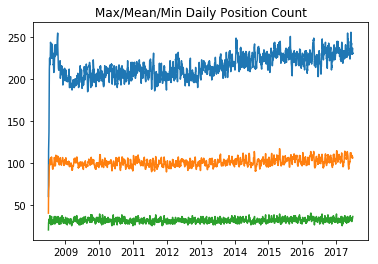

In [23]:
plt.figure()
plt.plot(run1.all_output[opencols].max(axis=1))
plt.plot(run1.all_output[opencols].mean(axis=1))
plt.plot(run1.all_output[opencols].min(axis=1))
plt.title('Max/Mean/Min Daily Position Count')
plt.show()